<a href="https://colab.research.google.com/github/AMEERKOTTA/Deep-Learning-and-Artificial-Intelligence-Tensorflow-2.0/blob/main/Chapter%2006%20%3A%20Recurrent%20Neural%20Networks%2C%20Time%20Series%20and%20Sequence%20Data/10_demo_of_long_distance_problem_linear_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DEMO OF LONG DISTANCE PROBLEM-LINEAR MODEL**

IMPORT LIBRARIES

In [14]:
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

GENERATE THE DATASET

In [15]:
## build the dataset
## this is a non-linear and long distance dataset.
## Will test (long-distance) vs (short-distance) patterns.
## starts with a small T and increase it later.
T = 10
D = 1
X = []
Y = []

## function to get label from i1, i2, i3
def get_label(x, i1, i2, i3):
  ## x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, -1, -2, -3) ## short distance
  ## y = get_label(x, 0, 1, 2) ## long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

print(X.shape)
print(Y.shape)

(5000, 10)
(5000,)


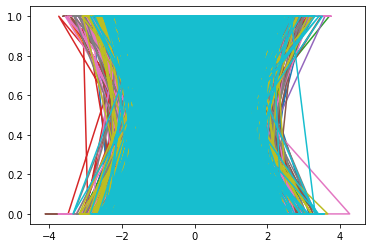

In [16]:
## plot the X and Y
plt.plot(X,Y);

+ If I put the i1, i2, i3 values in the Beginning of the Sequence,
    + It will be Hard to Remember it through out the Sequence.
+ If I put the i1, i2, i3 values in the End of the Sequence,
    + It will be Easy to Remember it to the Sequence.


PREPARING THE LINEAR MODEL

In [19]:
i = Input(shape = (T,))
x = Dense(1, activation = "sigmoid")(i)
model = Model(i, x)
model.summary()

## compile the model
model.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(learning_rate = 0.01),
    metrics = ["accuracy"]
)

## train the model
r = model.fit(X, Y, epochs = 100, validation_split = 0.5)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
79/79 [==============================] - 1s 6ms/step - loss: 0.7875 - accuracy: 0.5020 - val_loss: 0.7030 - val_accuracy: 0.5168
Epoch 2/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6989 - accuracy: 0.5052 - val_loss: 0.6941 - val_accuracy: 0.4976
Epoch 3/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6955 - accuracy: 0.4952 - val_loss: 0.6949 - val_accuracy: 0.4824
Epoch 4/100
79/79 [=================

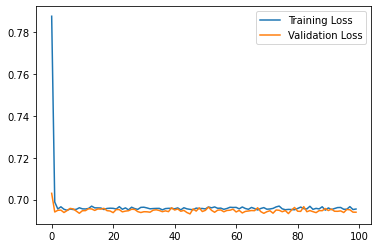

In [20]:
## plot the loss and accuracy
plt.plot(r.history["loss"], label = "Training Loss")
plt.plot(r.history["val_loss"], label = "Validation Loss")
plt.legend();
plt.show();

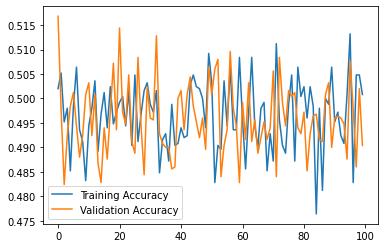

In [21]:
## plot the loss and accuracy
plt.plot(r.history["accuracy"], label = "Training Accuracy")
plt.plot(r.history["val_accuracy"], label = "Validation Accuracy")
plt.legend();
plt.show();

Pretty Bad Output We have.

***